## Predicting survival of patients with heart failure - project code
### EDA and Prepreprocessing 

#### *Drew Solomon*

##### Dataset description

This dataset contains the (anonymous) medical records of 299 heart failure patients admitted to the Institute of Cardiology and Allied hospital Faisalabad-Pakistan during April-December (2015). The dataset has 299 data points (for each individual patient) and 13 features (including the target variable). The patients consisted of 105 women and 194 men,ranging between 40 and 95 years old. All of patients had previous heart failures and ranked in top 2 of 4 classes of the NYHA score on heart failure progression (which classifies patients based on physical activity limitations (AHA, 2017)).

The dataset contains 13 features from electronic health records. The categorical features (all binary) are: anaemia, high blood pressure, diabetes, sex, smoking, and death event (if the patient during before the end of the follow-up period). The continuous features are: age, creatinine phosphokinase (level of the CPK enzyme in the blood - an indicator of muscle tissue damage), ejection fraction (% of blood leaving the heart at each contraction), platelets, serum creatinine (creatinine in the blood - indicator of kidney dysfunction), serum sodium (sodium in the blood - possible indicator of heart failure if very low), and time (days between hospital visit and follow-up).

Dataset source: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

### Exploratory Data Analysis 

In [12]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import matplotlib.patches as mpatches

# load the heart failure clinical records dataset
df = pd.read_csv('../data/heart_failure_clinical_records_dataset.csv')

ModuleNotFoundError: No module named 'pandas'

In [5]:
print("shape:",df.shape)
print(df.describe())
df.head()
df.columns

NameError: name 'df' is not defined

In [6]:
# rename column names
df.columns=['age', 'anaemia', 'creatinine phosphokinase', 'diabetes',
       'ejection fraction', 'high blood pressure', 'platelets',
       'serum creatinine', 'serum sodium', 'sex', 'smoking', 'time',
       'death event']

columns = df.columns

NameError: name 'df' is not defined

In [38]:
df.head()

,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high blood pressure,platelets,serum creatinine,serum sodium,sex,smoking,time,death event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [39]:
# check for missing values
df.isnull().sum(axis=0)

age                         0
anaemia                     0
creatinine phosphokinase    0
diabetes                    0
ejection fraction           0
high blood pressure         0
platelets                   0
serum creatinine            0
serum sodium                0
sex                         0
smoking                     0
time                        0
death event                 0
dtype: int64

Variable: age
count    299.000
mean      60.834
std       11.895
min       40.000
25%       51.000
50%       60.000
75%       70.000
max       95.000
Name: age, dtype: float64


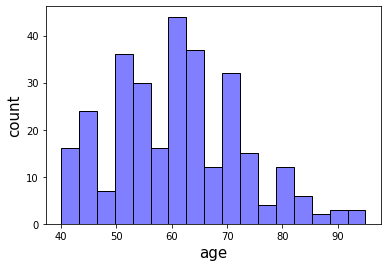

Variable: anaemia
0    170
1    129
Name: anaemia, dtype: int64


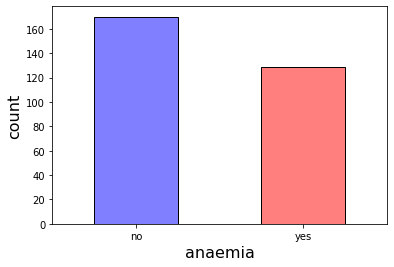

Variable: creatinine phosphokinase
count     299.000
mean      581.839
std       970.288
min        23.000
25%       116.500
50%       250.000
75%       582.000
max      7861.000
Name: creatinine phosphokinase, dtype: float64


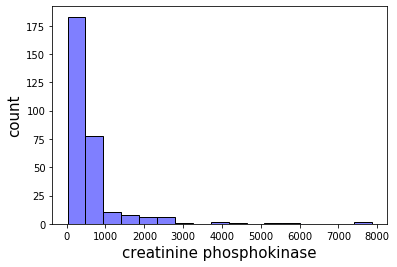

Variable: diabetes
0    174
1    125
Name: diabetes, dtype: int64


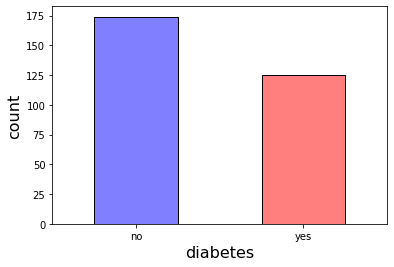

Variable: ejection fraction
count    299.000
mean      38.084
std       11.835
min       14.000
25%       30.000
50%       38.000
75%       45.000
max       80.000
Name: ejection fraction, dtype: float64


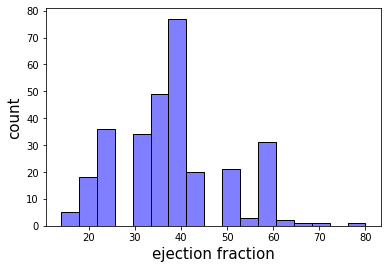

Variable: high blood pressure
0    194
1    105
Name: high blood pressure, dtype: int64


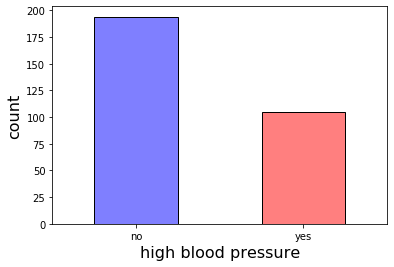

Variable: platelets
count       299.000
mean     263358.029
std       97804.237
min       25100.000
25%      212500.000
50%      262000.000
75%      303500.000
max      850000.000
Name: platelets, dtype: float64


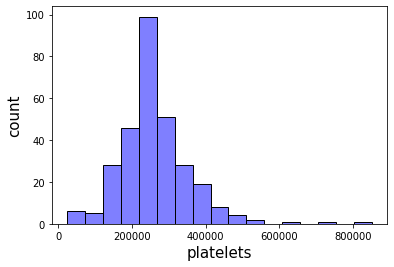

Variable: serum creatinine
count    299.000
mean       1.394
std        1.035
min        0.500
25%        0.900
50%        1.100
75%        1.400
max        9.400
Name: serum creatinine, dtype: float64


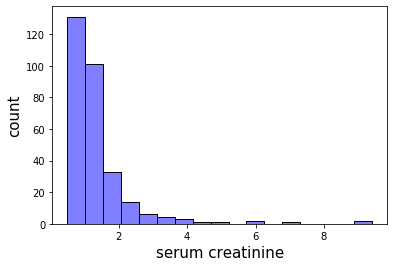

Variable: serum sodium
count    299.000
mean     136.625
std        4.412
min      113.000
25%      134.000
50%      137.000
75%      140.000
max      148.000
Name: serum sodium, dtype: float64


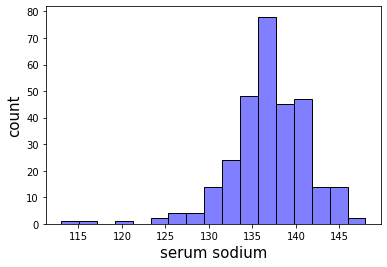

Variable: sex
1    194
0    105
Name: sex, dtype: int64


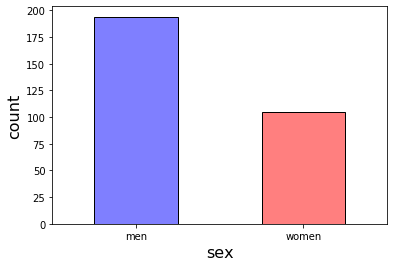

Variable: smoking
0    203
1     96
Name: smoking, dtype: int64


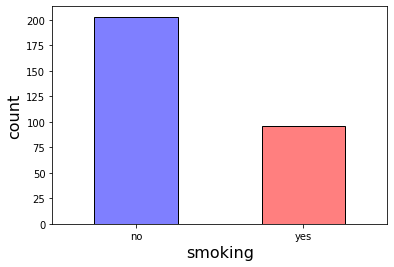

Variable: time
count    299.000
mean     130.261
std       77.614
min        4.000
25%       73.000
50%      115.000
75%      203.000
max      285.000
Name: time, dtype: float64


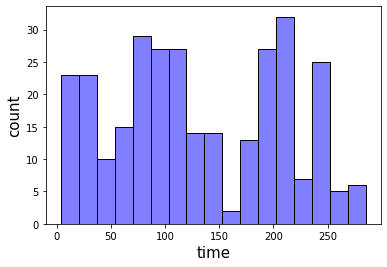

Variable: death event
0    203
1     96
Name: death event, dtype: int64


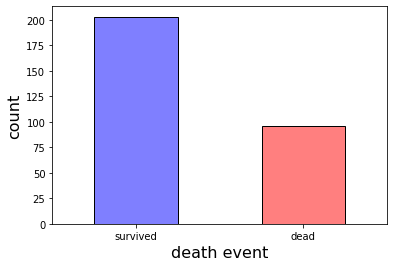

In [40]:
 # create a dataframe of continuous variables for scatter matrix
df_cont = pd.DataFrame() 

# loop through each column in the dataframe
for col in columns:
    
    # if the column is categorical, get the value count and plot a bar chart
    if df[col].value_counts().nunique() < 5:
        print("Variable: " + df[col].name)
        # print the value count - i.e. the count of each unique variable
        print(df[col].value_counts())
        
        # plot a bar chart 
        pd.value_counts(df[col]).plot.bar(color=[(0, 0, 1, 0.5),(1, 0, 0, 0.5)], edgecolor='black')
        plt.ylabel('count', fontsize=16)
        plt.xlabel(df[col].name, fontsize=16)
        
        # label bars for categories that require specific descriptions
        if df[col].name == 'sex':
            bars = ('men', 'women')
        elif df[col].name == 'death event':
            bars = ('survived', 'dead')
        else:
            bars = ('no', 'yes') 
            
        y_pos = np.arange(2)
        plt.xticks(y_pos, bars, rotation=0)
        
        # save figure
        figtitle = '../figures/barplot_' + df[col].name.replace(" ", "_") + '.png'
        plt.savefig(figtitle, dpi=300, format='png')
        
        plt.show()
  
    # otherwise, if the column is continuous, describe the variable and plot a histogram
    else:
        # print the description of the variable (rounded to 3 d.c. for clarity)
        print("Variable: " + df[col].name)
        print(df[col].describe().round(3))
        
        # add column to continous dataframe
        df_cont[df[col].name] = df[col]

        # plot a histogram (with labels)
        df[col].plot.hist(bins = int(np.sqrt(df.shape[0])), fc=(0, 0, 1, 0.5), edgecolor='black') 
        plt.xlabel(df[col].name, fontsize=15)
        plt.ylabel('count', fontsize=15)
        
        # save figure
        figtitle = '../figures/hist_' + df[col].name.replace(" ", "_") + '.png'
        plt.savefig(figtitle, dpi=300, format='png')
        
        plt.show()

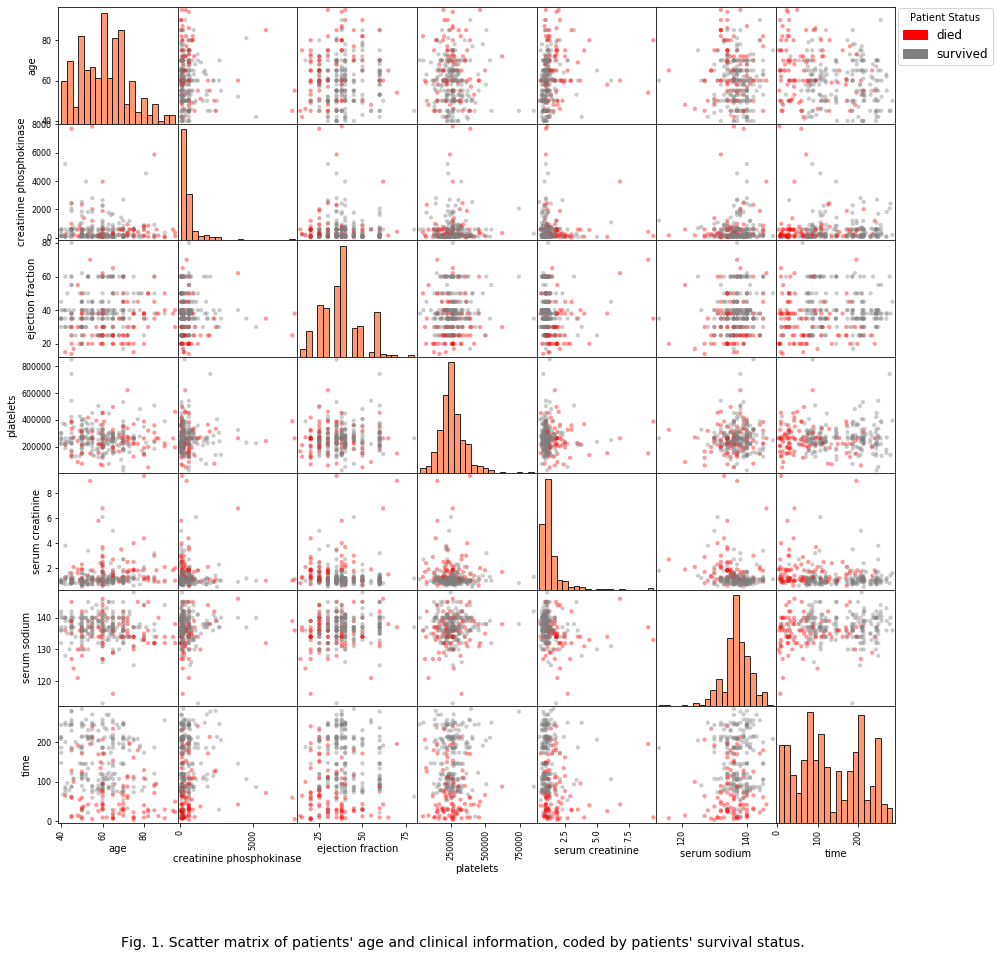

In [193]:
# scatter matrix
pd.plotting.scatter_matrix(df_cont, figsize=(15, 15), marker='o',hist_kwds={'bins': 20, 'color':'coral', 'alpha':.8, 'edgecolor':'black'}, 
                           s=18, alpha=.4, color=df['death event'].map(colors))

txt = "Fig. 1. Scatter matrix of patients' age and clinical information, coded by patients' survival status."
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=14)

red_patch = mpatches.Circle((0.5, 0.5), radius = 0.25, color='red', label='died')
gray_patch = mpatches.Circle((0.5, 0.5), radius = 0.25, color='gray', label='survived')
plt.legend(handles=[red_patch,gray_patch],loc=(1.02,6.5), title="Patient Status", fontsize=12)

# save figure
figtitle = '../figures/fig1_scattermatrix_by_survival' + '.png'
plt.savefig(figtitle, dpi=300, format='png', bbox_inches='tight')

plt.show()

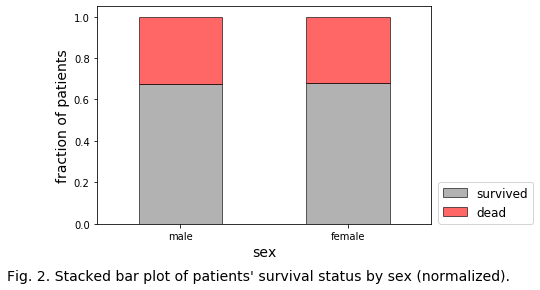

In [200]:
count_matrix = df.groupby(['sex', 'death event']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True, color=["gray", "red"], alpha=.6, edgecolor='black')
plt.ylabel('fraction of patients', fontsize=14)
plt.xlabel('sex', fontsize=14)
plt.xticks([0,1],['male','female'], rotation=0)
plt.legend(loc=4)

txt = "Fig. 2. Stacked bar plot of patients' survival status by sex (normalized)."
plt.figtext(0.5, -0.07, txt, wrap=True, horizontalalignment='center', fontsize=14)
plt.legend(['survived','dead'], loc=(1.02,0), fontsize=12)

# save figure
figtitle = '../figures/fig2_stacked_bar_by_sex_survival' + '.png'
plt.savefig(figtitle, dpi=300, format='png', bbox_inches='tight')
        
plt.show()

In [205]:
count_matrix = df.groupby(['sex', 'death event']).size().unstack()
count_matrix

death event,0,1
sex,,
0,71,34
1,132,62


In [225]:
# ratio of survived female patients
1-df[df['sex']==1]['death event'].mean()

0.6804123711340206

In [226]:
# ratio of survived male patients
1-df[df['sex']==0]['death event'].mean()

0.6761904761904762

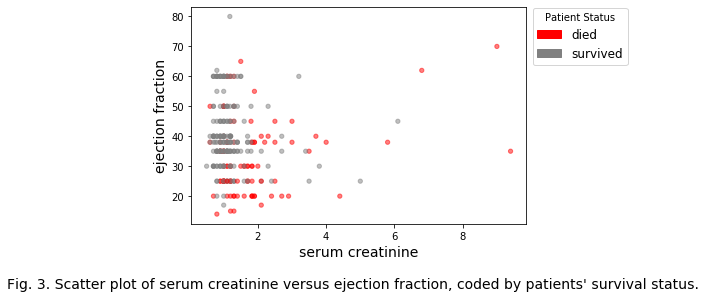

In [195]:
colors = {0:'gray', 1:'red'}

df.plot.scatter('serum creatinine','ejection fraction',s=18,alpha=0.5, c=df['death event'].map(colors)) 
plt.xlabel('serum creatinine', fontsize=14)
plt.ylabel('ejection fraction', fontsize=14)
#plt.legend(['dead', 'survived'])

red_patch = mpatches.Circle((0.5, 0.5), radius = 0.25, color='red', label='died')
gray_patch = mpatches.Circle((0.5, 0.5), radius = 0.25, color='gray', label='survived')
plt.legend(handles=[red_patch,gray_patch],loc=(1.02,0.73), title="Patient Status", fontsize=12)

txt = "Fig. 3. Scatter plot of serum creatinine versus ejection fraction, coded by patients' survival status."
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=14)

figtitle = '../figures/fig3_scatter_serum_creatinine_by_EF' + '.png'
plt.savefig(figtitle, dpi=300, format='png', bbox_inches='tight')

plt.show()

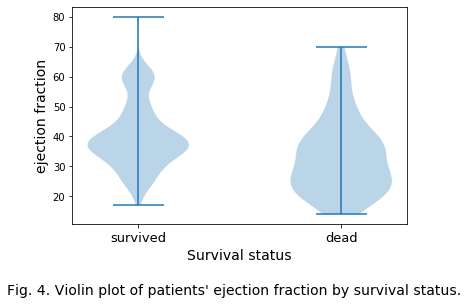

In [198]:
dataset = [df[df['death event']==0]['ejection fraction'].values,
           df[df['death event']==1]['ejection fraction'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['survived','dead'], fontsize=13)
plt.ylabel('ejection fraction', fontsize=14)
plt.xlabel('Survival status', fontsize=14)

txt = "Fig. 4. Violin plot of patients' ejection fraction by survival status."
plt.figtext(0.5, -0.12, txt, wrap=True, horizontalalignment='center', fontsize=14)

figtitle = '../figures/fig4_violin_EF_by_survival' + '.png'
plt.savefig(figtitle, dpi=300, format='png', bbox_inches='tight')

plt.show()

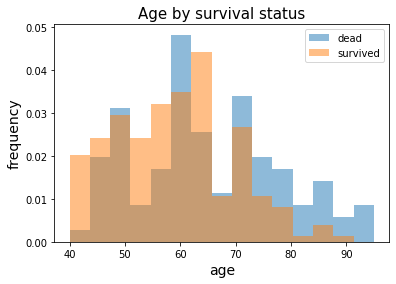

In [64]:
categories = df['death event'].unique()
bin_range = (df['age'].min(),df['age'].max())

for c in categories:
    plt.hist(df[df['death event']==c]['age'],alpha=0.5,label=c,range=bin_range,bins=15,density=True)
plt.title('Age by survival status', fontsize=15)
plt.ylabel('frequency', fontsize=14)
plt.xlabel('age', fontsize=14)
L=plt.legend()
L.get_texts()[0].set_text('dead')
L.get_texts()[1].set_text('survived')

# save figure
figtitle = '../figures/cat_hist_age_by_survival' + '.png'
plt.savefig(figtitle, dpi=300, format='png')

plt.show()

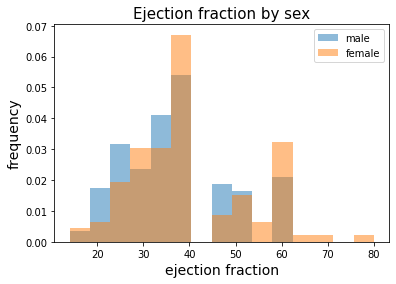

In [132]:
categories = df['sex'].unique()
bin_range = (df['ejection fraction'].min(),df['ejection fraction'].max())

for c in categories:
    plt.hist(df[df['sex']==c]['ejection fraction'],alpha=0.5,label=c,range=bin_range,bins=15,density=True)
plt.title('Ejection fraction by sex', fontsize=15)
plt.ylabel('frequency', fontsize=14)
plt.xlabel('ejection fraction', fontsize=14)
L=plt.legend()
L.get_texts()[0].set_text('male')
L.get_texts()[1].set_text('female')

# save figure
figtitle = '../figures/cat_hist_age_by_survival' + '.png'
plt.savefig(figtitle, dpi=300, format='png')

plt.show()

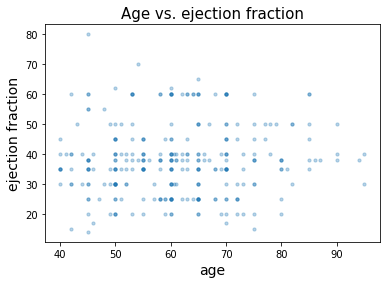

In [128]:
df.plot.scatter('age','ejection fraction',s=10,alpha=0.3) 
plt.title('Age vs. ejection fraction', fontsize=15)
plt.ylabel('ejection fraction', fontsize =14)
plt.xlabel('age', fontsize =14)
plt.suptitle('')

# save figure
figtitle = '../figures/scatter_age_by_EF' + '.png'
plt.savefig(figtitle, dpi=300, format='png')

plt.show()

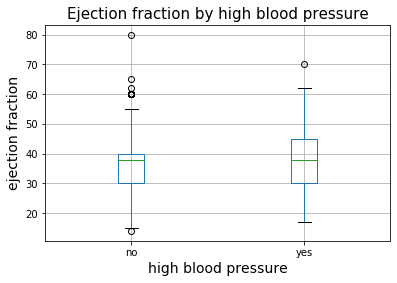

In [135]:
df[['ejection fraction','high blood pressure']].boxplot(by='high blood pressure')
plt.title('Ejection fraction by high blood pressure', fontsize=15)
plt.ylabel('ejection fraction', fontsize =14)
plt.xlabel('high blood pressure', fontsize =14)
plt.suptitle('')
plt.xticks([1, 2], ['no', 'yes'])

# save figure
figtitle = '../figures/boxplot_EF_by_high_blood_pressure' + '.png'
plt.savefig(figtitle, dpi=300, format='png')

plt.show()

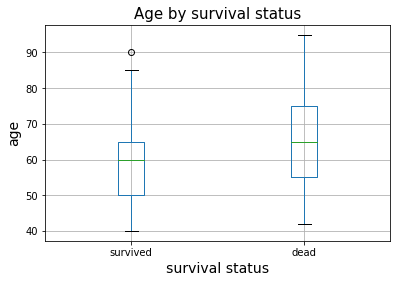

In [130]:
df[['age','death event']].boxplot(by='death event')
plt.title('Age by survival status', fontsize=15)
plt.ylabel('age', fontsize =14)
plt.xlabel('survival status', fontsize =14)
plt.suptitle('')
plt.xticks([1, 2], ['survived', 'dead'])

# save figure
figtitle = '../figures/boxplot_age_by_survival' + '.png'
plt.savefig(figtitle, dpi=300, format='png')

plt.show()

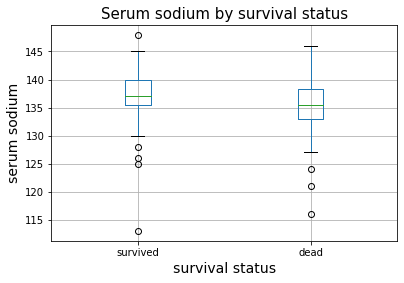

In [136]:
df[['serum sodium','death event']].boxplot(by='death event')
plt.title('Serum sodium by survival status', fontsize=15)
plt.ylabel('serum sodium', fontsize =14)
plt.xlabel('survival status', fontsize =14)
plt.suptitle('')
plt.xticks([1, 2], ['survived', 'dead'])

# save figure
figtitle = '../figures/boxplot_serum_sodium_by_survival' + '.png'
plt.savefig(figtitle, dpi=300, format='png')

plt.show()

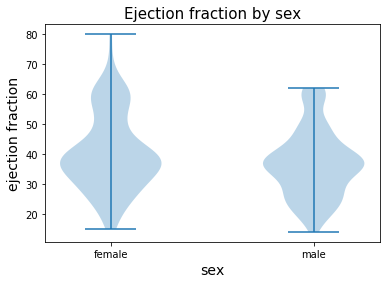

In [137]:
dataset = [df[df['sex']==0]['ejection fraction'].values,
           df[df['sex']==1]['ejection fraction'].values]

plt.title('Ejection fraction by sex', fontsize=15)
plt.violinplot(dataset = dataset)
plt.xticks([1,2],['female','male'])
plt.ylabel('ejection fraction', fontsize=14)
plt.xlabel('sex', fontsize=14)

# save figure
figtitle = '../figures/violin_EF_by_sex' + '.png'
plt.savefig(figtitle, dpi=300, format='png')

plt.show()

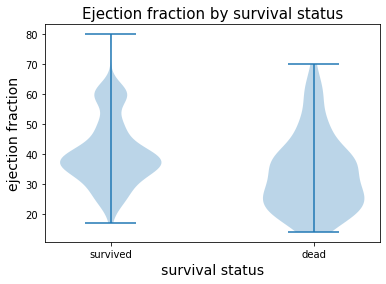

In [138]:
dataset = [df[df['death event']==0]['ejection fraction'].values,
           df[df['death event']==1]['ejection fraction'].values]

plt.title('Ejection fraction by survival status', fontsize=15)
plt.ylabel('ejection fraction', fontsize=14)
plt.xlabel('survival status', fontsize=14)
plt.violinplot(dataset = dataset)
plt.xticks([1,2],['survived','dead'])
plt.ylabel('ejection fraction')

# save figure
figtitle = '../figures/violin_EF_by_survival' + '.png'
plt.savefig(figtitle, dpi=300, format='png')

plt.show()

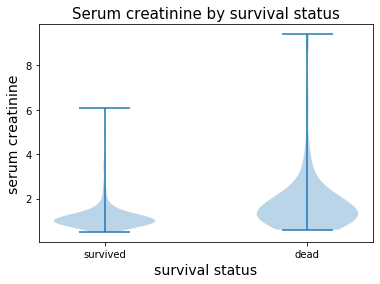

In [139]:
dataset = [df[df['death event']==0]['serum creatinine'].values,
           df[df['death event']==1]['serum creatinine'].values]

plt.violinplot(dataset = dataset)
plt.title('Serum creatinine by survival status', fontsize=15)
plt.ylabel('serum creatinine', fontsize=14)
plt.xlabel('survival status', fontsize=14)
plt.xticks([1,2],['survived','dead'])

# save figure
figtitle = '../figures/violin_serum_creatinine_by_survival' + '.png'
plt.savefig(figtitle, dpi=300, format='png')

plt.show()

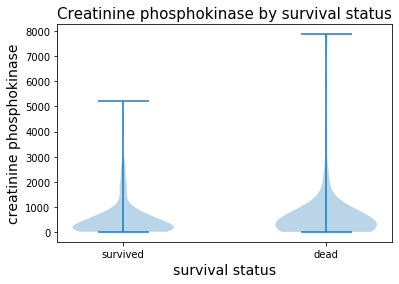

In [140]:
dataset = [df[df['death event']==0]['creatinine phosphokinase'].values,
           df[df['death event']==1]['creatinine phosphokinase'].values]

plt.violinplot(dataset = dataset)
plt.title('Creatinine phosphokinase by survival status', fontsize=15)
plt.ylabel('creatinine phosphokinase', fontsize=14)
plt.xlabel('survival status', fontsize=14)
plt.xticks([1,2],['survived','dead'])

# save figure
figtitle = '../figures/violin_CPK_by_survival' + '.png'
plt.savefig(figtitle, dpi=300, format='png')

plt.show()

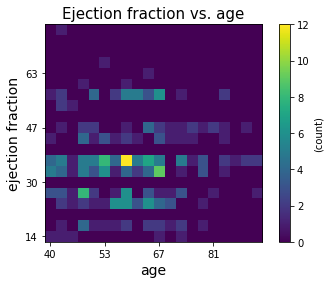

In [141]:
nbins = 20
heatmap, xedges, yedges = np.histogram2d(df['age'], df['ejection fraction'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.title('Ejection fraction vs. age', fontsize=15)
plt.imshow((heatmap).T, origin='lower') 
plt.xlabel('age', fontsize=14)
plt.ylabel('ejection fraction',fontsize=14)
plt.xticks(np.arange(nbins)[::int(nbins/4)],xedges[::int(nbins/4)].astype(int))
plt.yticks(np.arange(nbins)[::int(nbins/4)],yedges[::int(nbins/4)].astype(int))
plt.colorbar(label='(count)')

# save figure
figtitle = '../figures/heatmap_EF_by_sex' + '.png'
plt.savefig(figtitle, dpi=300, format='png')

plt.show()

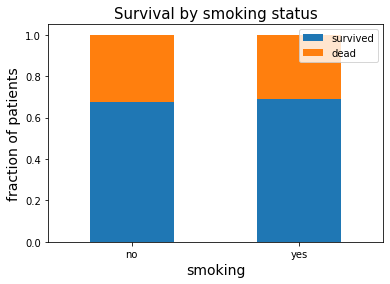

In [143]:
count_matrix = df.groupby(['smoking', 'death event']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)

plt.title('Survival by smoking status', fontsize=15)
plt.ylabel('fraction of patients', fontsize=14)
plt.xlabel('smoking', fontsize=14)
L=plt.legend(loc='upper right')
L.get_texts()[0].set_text('survived')
L.get_texts()[1].set_text('dead')
plt.xticks([0,1],['no','yes'], rotation=0)

# save figure
figtitle = '../figures/barplot_survival_by_smoking' + '.png'
plt.savefig(figtitle, dpi=300, format='png')

plt.show()

## Data preprocessing 

Key points:
- IID data
- 60/20/20 split, small $n$
- StratifiedKFold split for balance (compared against regular KFold)
- Classification goal (survive or not)


In [175]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# separate the feature matrix X, and target variable y
y = df['death event'] # the target variable is 'death', indicating whether or not the patient died before the follow-up visit
X = df.loc[:, df.columns != 'death event'] # all other columns are features

In [169]:
# set random state
random_state = 42

# check KFold split (high variance in balance)

# split into test and other sets
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)
print('test balance:',y_test.value_counts(normalize=True))

# do KFold split on other, separate training and validation sets
kf = KFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('Train balance:')
    print(y_train.value_counts(normalize=True), "\n")
    print('Validation balance:')
    print(y_val.value_counts(normalize=True), "\n")
    
    print('Training sets X, y:', X_train.shape,  y_train.shape, "\n")
    print('Validation sets X, y:', X_val.shape, y_val.shape, "\n")
    print('Test sets X, y:', X_test.shape, y_test.shape, "\n")
    

test balance: 0    0.583333
1    0.416667
Name: death event, dtype: float64
Train balance:
0    0.664804
1    0.335196
Name: death event, dtype: float64 

Validation balance:
0    0.816667
1    0.183333
Name: death event, dtype: float64 

Training sets X, y: (179, 12) (179,) 

Validation sets X, y: (60, 12) (60,) 

Test sets X, y: (60, 12) (60,) 

Train balance:
0    0.731844
1    0.268156
Name: death event, dtype: float64 

Validation balance:
0    0.616667
1    0.383333
Name: death event, dtype: float64 

Training sets X, y: (179, 12) (179,) 

Validation sets X, y: (60, 12) (60,) 

Test sets X, y: (60, 12) (60,) 

Train balance:
0    0.692737
1    0.307263
Name: death event, dtype: float64 

Validation balance:
0    0.733333
1    0.266667
Name: death event, dtype: float64 

Training sets X, y: (179, 12) (179,) 

Validation sets X, y: (60, 12) (60,) 

Test sets X, y: (60, 12) (60,) 

Train balance:
0    0.722222
1    0.277778
Name: death event, dtype: float64 

Validation balance:
0  

In [177]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold

# use stratified K Fold instead: low variation in balance
random_state = 42

# stratified other-test split
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',y_test.value_counts(normalize=True))

# StratifiedKFold split on other, separate training and validation sets
kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('Train balance (stratified):')
    print(y_train.value_counts(normalize=True), "\n")
    print('Validation balance (stratified):')
    print(y_val.value_counts(normalize=True), "\n")

test balance: 0    0.683333
1    0.316667
Name: death event, dtype: float64
Train balance (stratified):
0    0.675978
1    0.324022
Name: death event, dtype: float64 

Validation balance (stratified):
0    0.683333
1    0.316667
Name: death event, dtype: float64 

Train balance (stratified):
0    0.675978
1    0.324022
Name: death event, dtype: float64 

Validation balance (stratified):
0    0.683333
1    0.316667
Name: death event, dtype: float64 

Train balance (stratified):
0    0.681564
1    0.318436
Name: death event, dtype: float64 

Validation balance (stratified):
0    0.666667
1    0.333333
Name: death event, dtype: float64 

Train balance (stratified):
0    0.677778
1    0.322222
Name: death event, dtype: float64 

Validation balance (stratified):
0    0.677966
1    0.322034
Name: death event, dtype: float64 



In [178]:
print("Initial training set shape:", X_train.shape)
print("Initial validation set shape:", X_val.shape)
print("Initial test set shape:", (X_test.shape))

Initial training set shape: (180, 12)
Initial validation set shape: (59, 12)
Initial test set shape: (60, 12)


In [179]:
# drop 'time' feature
X_train = X_train.drop(['time'], axis=1)
X_val = X_val.drop(['time'], axis=1)
X_test = X_test.drop(['time'], axis=1)

In [180]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [192]:
# collect which encoder to use on each feature
std_ftrs = ['age', 'creatinine phosphokinase', 'ejection fraction', 'platelets',
       'serum creatinine', 'serum sodium']

# collect all the encoders, pass through columns that are in the correct format already
preprocessor = ColumnTransformer(
    transformers=[('std', StandardScaler(), std_ftrs)],
    remainder='passthrough')

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

# print values from each preprocessed set to show reproducibility
print('Preprocessed training set:')
print(X_train_prep[0:2]) 
print('shape:', X_train_prep.shape, '\n')

print('Preprocessed validation set:')
print(X_val_prep[0:2]) 
print('shape:',X_val_prep.shape, '\n')

print('Preprocessed test set:')
print(X_test_prep[0:2])
print('shape:',X_test_prep.shape, '\n')

Preprocessed training set:
[[-0.67760484 -0.55045127  1.97236431  0.95389894 -0.56196655 -0.33500575
   0.          1.          0.          1.          0.        ]
 [ 1.21427335 -0.09348246 -1.49468233 -0.02902491  0.46763812 -1.4642386
   0.          0.          1.          1.          0.        ]]
shape: (180, 11) 

Preprocessed validation set:
[[-0.24763252 -0.25372971  0.23884099 -0.99286285 -0.3747657   0.56838054
   1.          0.          0.          0.          0.        ]
 [ 0.26833426 -0.48001292 -1.0613015  -0.21034095  0.93564024 -0.33500575
   0.          0.          0.          1.          0.        ]]
shape: (59, 11) 

Preprocessed test set:
[[-0.0756436  -0.37963827 -0.62792067 -1.12646415 -0.3747657   0.11668739
   1.          1.          0.          1.          1.        ]
 [-0.0756436   1.38484248 -0.19453984 -0.38211405 -0.46836612 -0.10915918
   0.          0.          1.          1.          0.        ]]
shape: (60, 11) 



### References 


Ahmad, T., Munir, A., Bhatti, S. H., Aftab, M., & Raza, M. A. (2017). Survival analysis of heart failure patients: A case study. PloS one, 12(7), e0181001.

American Heart Association. Classes of Heart Failure. www.heart.org/en/health-topics/heart-failure/what-is-heart-failure/classes-of-heart-failure.

Buchan, T. A., Ross, H. J., McDonald, M., Billia, F., Delgado, D., Posada, J. D., ... & Alba, A. C. (2019). Physician prediction versus model predicted prognosis in ambulatory patients with heart failure. The Journal of Heart and Lung Transplantation, 38(4), S381.

World Health Organization. Cardiovascular Diseases (CVDs). www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds).

Chicco, D., & Jurman, G. (2020). Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC medical informatics and decision making, 20(1), 16.


Heart Disease Facts. 8 Sept. 2020, www.cdc.gov/heartdisease/facts.htm.

Raphael, C., Briscoe, C., Davies, J., Whinnett, Z. I., Manisty, C., Sutton, R., ... & Francis, D. P. (2007). Limitations of the New York Heart Association functional classification system and self-reported walking distances in chronic heart failure. Heart, 93(4), 476-482.

Savarese, G., & Lund, L. H. (2017). Global public health burden of heart failure. Cardiac failure review, 3(1), 7.